# KVN, Margaret & bingo - Part 1
> First part of a (hopefully) friendly introduction to Neural Networks and their capabilities. In this part, we introduce the problem we will try and solve and what Neural Networks are.


- toc: true 
- badges: false
- comments: true
- categories: [machine learning]

**Neural Networks** (NNs) are truly a hot topic these days. Or at least, the so-called Artificial Intelligence is. Nonetheless, I realized that, for most of my friends outside the machine learning niche, Neural Networks seem like dark magic (at least for the ones that care enough to ask). Here, I want to present an entertaining and illustrating narrative on what NNs are, how they work and an example of a problem that can (and actually is) solved by the technology.

> Note: You will find here some of the mathematics and technical concepts. I introduce them for rigurosity and also to allow interested readers to delve deeper. I tried to make it approachable no matter what. So just skip whatever feels too technical and you will also understand the concepts, hopefully. If, despite that, you still have questions, please ask them in the comments!

# Our very realistic problem
Imagine we are part of the **ABC, the Amazing Bingo Club**. This year it's the 100th anniversary of the club and a big event is coming up. We will have the biggest [bingo](https://en.wikipedia.org/wiki/Bingo_(American_version)) game the ABC has ever seen, for all the 29 members will be present! Moreover, we want to honor our beloved founder Margaret by letting her draw and call the numbers. But there is a problem. Margaret is blind now.

Let me say it again: **Margaret. is. blind.** :scream:

Fear not! We may have a solution. One of the members of the club has a KVN (pronounced Kevin), from the [Final Space](https://en.wikipedia.org/wiki/Final_Space) (much recommended series) universe. Meet KVN:


![](kvn/kvn.png "KVN, a Deep Space Insanity Avoidance Companion.")

KVN is a robot usually employed as a Deep Space Insanity Avoidance Companion. Now, we want to use it to read the numbers that Margaret draws and whisper them to her so she can then call the numbers aloud. The situation here is that KVN doesn't have a number recognition system implemented. That is, KVN can see but he is not able to recognize numbers... The good news are that we have access to KVN's main system, so if we are skilled enough, we could implement a digit recognizer into him.

But there is yet another problem (and we hope it to be the last). The ABC is in a really low budget so the numbers that Margaret will draw are handwritten numbers in small pieces of paper. Thus, we cannot just make KVN recognize some standard digits. Moreover, in the 100 years of the club, some numbers have been lost and replaced by many different members. So, in the end, we have a lot of different number styles within our bingo set.

In summary, then, we would like for KVN to be able to read handwritten digits similar to the ones below and whisper to Margaret:

_It's a 2..._

![](kvn/digit_examples.png "Examples of 2 in the ABC bingo set.")

Yeah, right, everything sounds pretty cool but how do we do it?

Well, one might think in the possibility to hardcode inside KVN's brain some rules to identify numbers such as the 2's have a semicircle on top, probably a loop on the bottom left, etc... As one can already divise, this is a ton of work for not so promising results. If that's not enough, it is also not that straightforward how to define such rules.

But what if we could show KVN a lot of examples of numbers so he can create his own rules to recognize them? What if we could do something like...

- **Us**: Look KVN, this is a 2, this is also a 2, this is a 1, this is an 8, this is also an 8, etc.

- **Us**: _\*Showing him a new 2\*_ What is this?

- **KVN**: A 2!!!!

Here is when Neural Networks (NN) enter the game. **NNs are a tool that will allow KVN to learn to recognize digits as described above.**

> Note: What we are talking here is supervised learning of image classification, in the sense that we have labeled examples to teach KVN (e.g. images of 2 that we know are a 2) and the goal is to identify which number the image represents. NNs are used in a myriad of problems, not solely in supervised learning nor image classification.

# First things first

When we talk about Neural Networks, we are actually talking about **Artifical Neural Networks** (ANNs). ANNs are vaguely inspired by the Biological Neural Networks (BNNs). BNNs or neural circuits are groups of interconnected neurons, a type of cell of the nervous system (including the brain). That is, your brain is full of BNN (among other things).


## Neurons

These cells called neurons constitute a great part of our brain. Here a neuron:



![](kvn/neuron.png "Credit: https://en.wikipedia.org/wiki/Neuron")

Their function, extremely simplified, is to transmit information. The way they work is the following:

1. A neuron receives a series of inputs from other neurons.
2. If the sum of these inputs is above a certain threshold, the neuron triggers and emits an output (that will go to other neurons).

More or less, we have 100 billion of these in our brain, which is A LOT. In principle, thanks to them we are able to sense and think but we will not delve deep into this.

The main idea we are interested in is: if we can learn with our brains which are constituted by neurons which are heavily interconnected... can we program artificial neurons, interconnect them and obtain an artificial brain that does something similar? Well, this is exactly what ANNs (NNs from now on) try to do.

### Artificial neurons
In order to mimic the behaviour of neurons, artifical neurons are usually modeled as follows (image source):


![](kvn/artificial_neuron.png "Artificial neuron. Credit: https://sausheong.github.io/posts/how-to-build-a-simple-artificial-neural-network-with-go/")

As we can see, these neurons have a series of **inputs** $i_i$, a **weight** $w_i$ associated with each input, an **activation function** $\sigma$ and an **output** $o$.

This might seem a bit obscure so let's try to clarify it a bit. The typical example used to explain artificial neurons is the following: Imagine there is a concert of our favourite group on Saturday and we want to decide whether or not to attend it. In order to take this decision, we consider several factors:

- Will someone come with me?
- Will it be good weather?
- Can I go there by public transportation?

To all these questions, which are my inputs $i_i$, affirmative answers (i.e. $1$) are good. But are they equally important? It might be the case that I don't really care if I have to go alone but I cannot withstand bad weather. How do I represent this? The weights $w_i$ are exactly for that. Bigger $w_i$ means bigger importance. Then, the activation function $\sigma$ is my *decision function*. A very simple function would be:

$$ o = \sigma(i) = 
\begin{cases}
    1,& \text{if } \sum_i w_i i_i \gt threshold\\
    0 ,& \text{if } \sum_i w_i i_i \lt threshold
\end{cases}
$$

That is, if the **weighted input** $\sum_i w_i i_i$ is greater than a **threshold**, the output $o$ will be $o=1$, I will go to the concert. In other words, only when the conditions I am considering to go to the concert are good enough for me I will attend the event.

In the neuron model, we can see that we have $\Sigma | \sigma$. This is because the illustrative case is to use as an activation function the one explained above, which is simply the sum $\Sigma$ of the weighted inputs. But in general, the activation function used are a little bit more complicated than that. The idea is to introduce non-linearity, but it will stay out of the scope of this series. A general expression for these artificial neurons is:

$$ o = \sigma \big( \sum_i w_i i_i + b \big) $$

Notice that a $b$, called **bias**, has appeared. This is equivalent to the threshold we were talking before, just a little rearranged. It can be thought as *how difficult* is to trigger the neuron.

There are many activation functions. The most popular are the following:

- **Sigmoid function**:

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

- **Rectifier function** (sometimes called ReLU):

$$ \sigma(x) = \max(0,x) $$

And their shape:


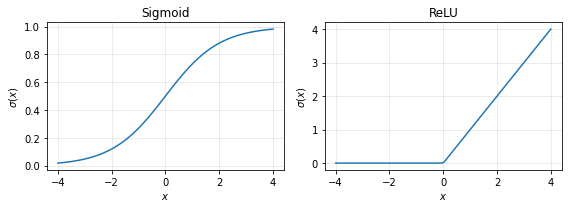

In [2]:
#collapse-hide
import numpy as np
import matplotlib.pyplot as plt

# Define x grid.
xx = np.linspace(-4,4,100)

# Define response from the different activation functions.
y_sig = 1/(1+np.exp(-xx))
y_relu = [max(0,x) for x in xx]

# Plot the activation functions.
plt.figure(figsize=(5,2))

# Sigmoid
ax1 = plt.subplot(121)
ax1.plot(xx,y_sig)
ax1.set_title("Sigmoid")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$\sigma(x)$")
ax1.grid(alpha=0.3)

# ReLU
ax2 = plt.subplot(122)
ax2.plot(xx,y_relu)
ax2.set_title("ReLU")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\sigma(x)$")
ax2.grid(alpha=0.3)

plt.tight_layout();

## Neural Networks

Now that we have our neurons, we can build our neural networks by interconnecting them. This would be a simple of example of such networkNow that we have our neurons, we can build our neural networks by interconnecting them. This is simple of example of such network:



![](kvn/neural_net.png "Neural Network example. Credit: https://sausheong.github.io/posts/how-to-build-a-simple-artificial-neural-network-with-go/")

This seems a bit more complicated but it's actually the same idea with just more neurons. The **input layer** is basically a representation of the input values (there are no neurons in the input layer). The **output layer** are the artifical neurons which produce the final outputs. The **hidden layer**, basically a layer which is not an input nor an output, is constituted by several neurons. Each neuron has its inputs, its outputs and its activation function. If we talk about parameters, each neuron has a set of weights $w$ (one for each input $i$ it receives) and a bias $b$. We can already see that for this very little example we already have a lot of parameters. This will be important later on.

This small *"brain"* works as following: there are a series of inputs that go to the hidden layer, each neuron in this layer produces an output that becomes an input for the next layer (the output layer in this case) and finally, the output layer neurons produce the final outputs.

Returning to our original problem, we want to implement one of this Neural Networks inside KVN such that when we give him an image of a number as an input, he will then whisper which number it is as an output.

> Note: This example is what it is called a feedforward neural network. In these networks, there are no cycles. All information always goes forward from input to output. There are other types of neural networks with different properties, such as recurrent neural networks, but they are more complicated so we will stick to the "easy" case.

So far, we have defined the _mini-brain_ we will implement into KVN. In the following parts (coming soon), we will explore how Neural Networks can learn a task and, ultimately, do what we want them to do.

- [Part 2](https://bepuca.dev/machine%20learning/2020/06/01/kvn-part-2.html): The training building blocks: loss functions, gradient descent and backpropagation.

- [Part 3](https://bepuca.dev/machine%20learning/2020/06/13/kvn-part-3.html): Actual training of a Neural Network to identify handwritten digits.